In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM, GRU, Bidirectional
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tiantan.csv to Tiantan.csv


In [ ]:
data=read_csv("Tiantan.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2


In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Tiantan.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [ ]:
dataset.drop("No", axis=1, inplace=True)

In [ ]:
dataset=dataset.fillna(method="pad")

In [ ]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
dataset.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,82.255892,106.657004,14.475397,53.237608,1308.279318,56.464766,13.668746,1012.551858,2.445117,0.063983,1.860712
std,81.130568,90.433491,20.508332,31.999587,1184.456071,60.844059,11.460066,10.266719,13.812242,0.786059,1.280429
min,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,58.000000,85.000000,7.000000,47.000000,900.000000,41.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,114.000000,144.000000,17.000000,71.000000,1600.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


In [ ]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

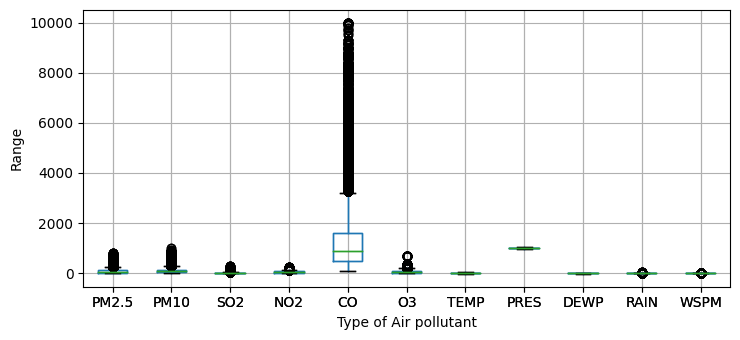

In [ ]:
#Box plot
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./isobaric.jpg', dpi=400)
plt.show()

<ipython-input-12-59c8aa51687e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(dataset.corr()))
<ipython-input-12-59c8aa51687e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)


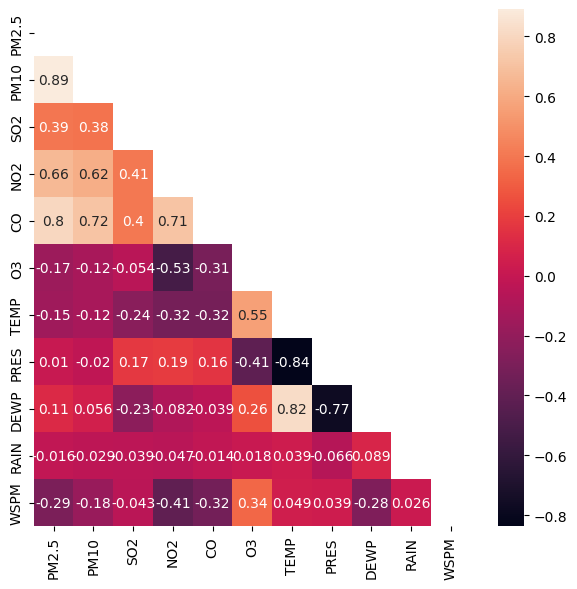

In [ ]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
plt.savefig(r'./Tiantanheat.jpg', dpi=400)
# displaying heatmap
plt.show()

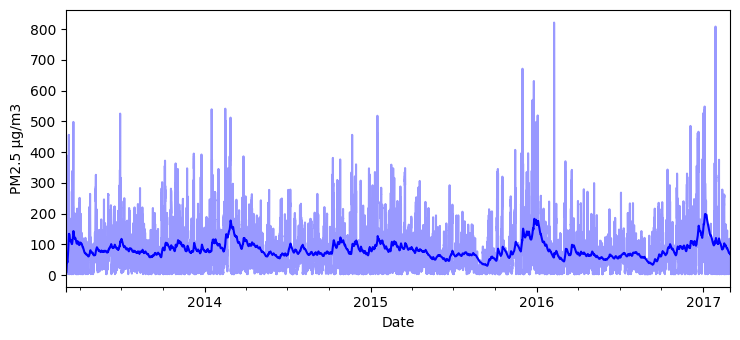

In [ ]:
dataset['PM2.5'].to_frame()
f.set_figwidth(5)
f.set_figheight(3)
p=dataset["PM2.5"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=dataset['PM2.5'].ewm(span=720).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('PM2.5 µg/m3')
plt.savefig(r'./Tiantan.jpg', dpi=400)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 7., 6., ..., 7., 6., 5.], dtype=float32)

In [ ]:
values

array([[ 6. ,  6. ,  4. , ...,  0. ,  6. ,  5.7],
       [ 6. , 29. ,  5. , ...,  0. ,  7. ,  3.9],
       [ 6. ,  6. ,  4. , ...,  0. ,  6. ,  5.3],
       ...,
       [18. , 32. ,  4. , ...,  0. ,  7. ,  1.1],
       [15. , 42. ,  5. , ...,  0. ,  6. ,  1.2],
       [15. , 50. ,  5. , ...,  0. ,  5. ,  1.3]], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])

  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
model = Sequential()
model.add(Bidirectional(GRU(units = 100, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 100, return_sequences = True)))
model.add(Dropout(0.2))

model.add(Bidirectional(GRU(units = 100, return_sequences = True)))
model.add(Dropout(0.2))


model.add(Bidirectional(GRU(units = 100)))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=64,validation_data=(X_test, Y_test), verbose=1, shuffle=False)

Epoch 1/100
411/411 [==============================] - 34s 25ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 2/100
411/411 [==============================] - 8s 19ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 3/100
411/411 [==============================] - 7s 16ms/step - loss: 0.0011 - val_loss: 9.6821e-04
Epoch 4/100
411/411 [==============================] - 7s 17ms/step - loss: 9.4606e-04 - val_loss: 7.7913e-04
Epoch 5/100
411/411 [==============================] - 7s 17ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/100
411/411 [==============================] - 7s 17ms/step - loss: 8.2114e-04 - val_loss: 7.7689e-04
Epoch 7/100
411/411 [==============================] - 7s 16ms/step - loss: 7.3394e-04 - val_loss: 7.2920e-04
Epoch 8/100
411/411 [==============================] - 8s 19ms/step - loss: 7.7003e-04 - val_loss: 7.7155e-04
Epoch 9/100
411/411 [==============================] - 7s 18ms/step - loss: 6.8670e-04 - val_loss: 7.6280e-04
Epoch 10/100
411/411 [===============

In [ ]:
from keras.models import load_model
model.save('AirPollutionBiLSTMGRU.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


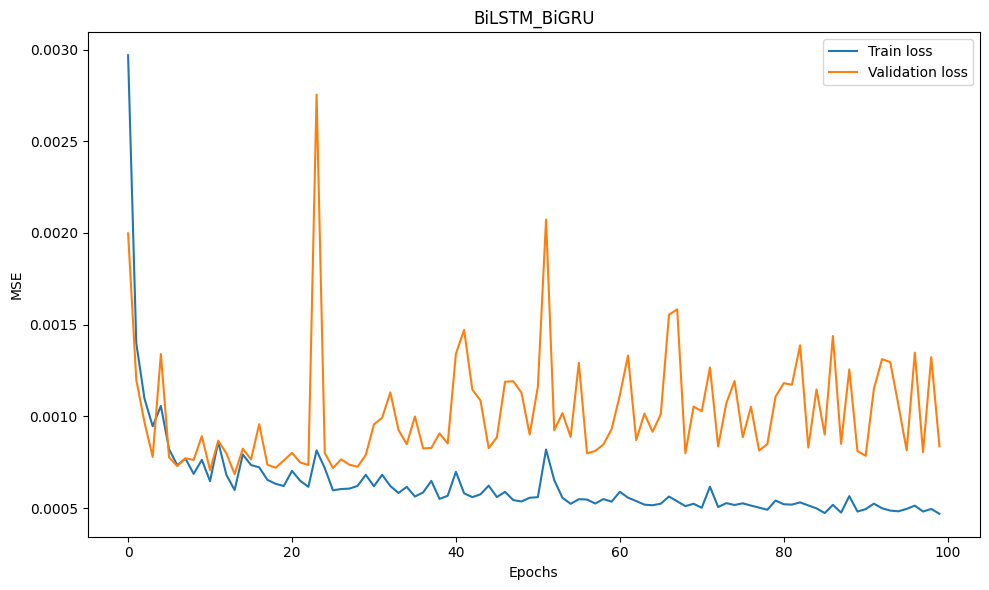

<Figure size 750x350 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("BiLSTM_BiGRU")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('Traingraph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 2s 10ms/step
RMSE at 40 = 5.5301595
RMAE at 40 = 2.0777893
MAPE at 40 = 0.43881908
R2 at 40 = 0.8781958628220978
2/2 [==============================] - 0s 8ms/step
RMSE at 45 = 6.462483
RMAE at 45 = 2.1755724
MAPE at 45 = 0.4001832
R2 at 45 = 0.93691438437394
2/2 [==============================] - 0s 8ms/step
RMSE at 50 = 7.921673
RMAE at 50 = 2.3459733
MAPE at 50 = 0.37315047
R2 at 50 = 0.9468857080504957
2/2 [==============================] - 0s 10ms/step
RMSE at 55 = 8.278539
RMAE at 55 = 2.38203
MAPE at 55 = 0.3468047
R2 at 55 = 0.9459831554790531
2/2 [==============================] - 0s 8ms/step
RMSE at 60 = 9.198506
RMAE at 60 = 2.4806585
MAPE at 60 = 0.32726988
R2 at 60 = 0.941858518459727
3/3 [==============================] - 0s 6ms/step
RMSE at 65 = 9.461831
RMAE at 65 = 2.5452204
MAPE at 65 = 0.3096596
R2 at 65 = 0.9463882944070091
3/3 [==============================] - 0s 10ms/step
RMSE at 70 = 10.63442
RMAE at 70 = 2.7190845
MAPE at 

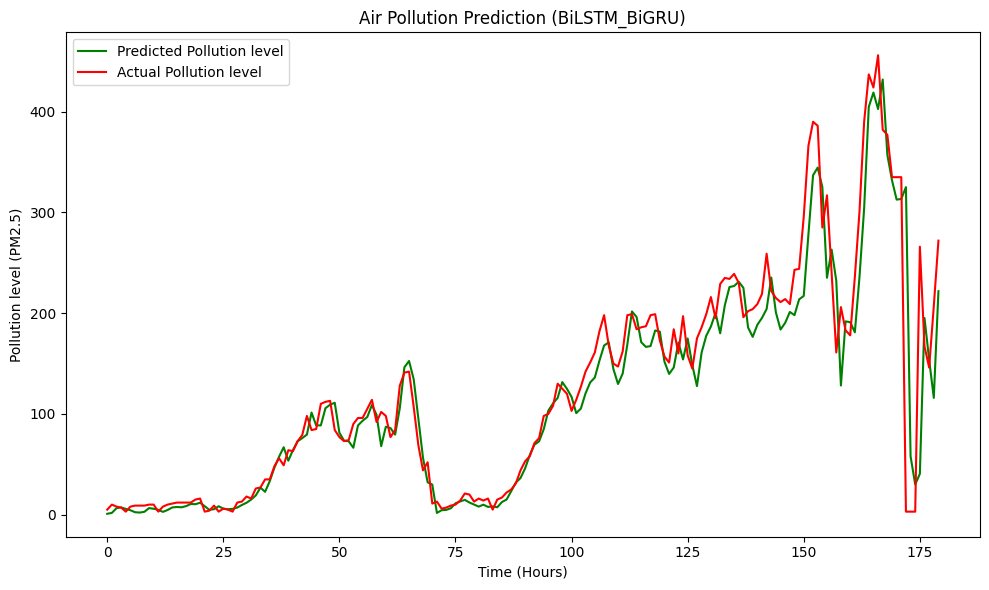

<Figure size 750x350 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (BiLSTM_BiGRU)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graphBiLSTMBi_GRU.png')

In [ ]:
savetxt('Predict_BiLSTM_BiGRU.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_BiLSTMBiGRU.csv', Y_test, delimiter=',')